In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import otgmonitor as otg
from astropy.table import Table
from Ska.Matplotlib import plot_cxctime
import Ska.engarchive.fetch as fetch

In [2]:
T_PER_SHORT_MOVE = 0.128125 # sec

## Example

In [3]:
start = '2021:005:13:07:00.000'
stop = '2021:005:13:10:30.000'

In [4]:
msidset = ['4MP28AV', '4MP28BV', # MCE A/B: +28 VOLT MONITOR
           '4MP5AV', '4MP5BV', # MCE A/B: +5 VOLT MONITOR
           '4HENLAX', '4HENLBX', # MCE A/B: HETG ENABLE LOGIC STATUS MONITOR
           '4LENLAX', '4LENLBX', # MCE A/B: LETG ENABLE LOGIC STATUS MONITOR
           '4HEXRAX', '4HEXRBX', # MCE A/B: HETG EXECUTE RELAY STATUS MONITOR
           '4LEXRAX', '4LEXRBX', # MCE A/B: LETG EXECUTE RELAY STATUS MONITOR
           '4HPOSBRO', '4LPOSBRO']

In [5]:
dat = fetch.MSIDset(msidset, start=start, stop=stop)

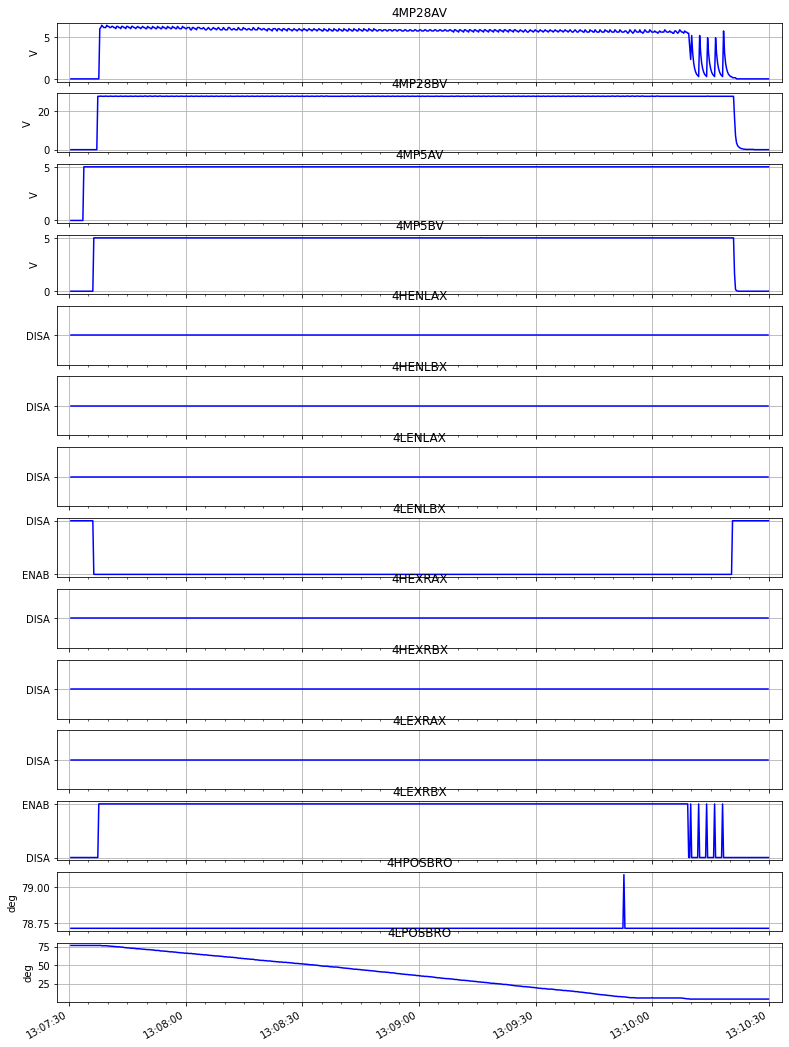

In [6]:
plt.figure(figsize=(13, 20))
for ii, msid in enumerate(msidset):
    plt.subplot(len(msidset), 1, ii + 1)
    dat[msidset[ii]].plot()
    #plt.ylim(3.5, 5.5)
    plt.grid()

## OTG Monitor

In [7]:
#start = '2002:002:00:00:00.000'
#stop = '2005:300:00:00:00.000'

In [8]:
start = '2021:001:00:00:00.000'
stop = '2021:200:00:00:00.000'

In [9]:
out = otg.otgmon(start, stop)

In [10]:
otgm = Table(out)

In [11]:
len(otgm)

626

In [12]:
moves_by_tstart = otgm.group_by('tstart')

In [13]:
len(moves_by_tstart.groups)

234

In [14]:
def get_n_moves(otgm, grating, direction):
    if grating not in ('HETG, LETG'):
        raise ValueError('grating should be one of LETG, HETG')
        
    if direction not in ('RETR', 'INSR'):
        raise ValueError("direction should be one of 'RETR', 'INSR'")
        
    n_moves = []
    n_moves_short = []
    times = []
    moves_by_tstart = otgm.group_by('tstart')
    
    for grp in moves_by_tstart.groups:
        if grp['grating'][0] == grating and grp['direction'][0] == direction:
            n_moves.append(len(grp))
            idx = grp['duration'] < 1.0
            n_moves_short.append(np.sum(idx))
            times.append(grp['tstart'][0])
            
    return {'times': times, 'n_moves': n_moves, 'n_moves_short': n_moves_short}

In [15]:
def get_long_move_durations(otgm, grating, direction):
    if grating not in ('HETG, LETG'):
        raise ValueError('grating should be one of LETG, HETG')
        
    if direction not in ('RETR', 'INSR'):
        raise ValueError("direction should be one of 'RETR', 'INSR'")
        
    long_durations = []
    times = []
    moves_by_tstart = otgm.group_by('tstart')
    
    for grp in moves_by_tstart.groups:
        if grp['grating'][0] == grating and grp['direction'][0] == direction:
            long_durations.append(grp['duration'][0])
            times.append(grp['tstart'][0])
            
    return {'times': times, 'long_durations': long_durations}

In [16]:
def get_short_move_durations(otgm, grating, direction):
    if grating not in ('HETG, LETG'):
        raise ValueError('grating should be one of LETG, HETG')
        
    if direction not in ('RETR', 'INSR'):
        raise ValueError("direction should be one of 'RETR', 'INSR'")
        
    short_durations = []
    times = []
    moves_by_tstart = otgm.group_by('tstart')
    
    for grp in moves_by_tstart.groups:
        if grp['grating'][0] == grating and grp['direction'][0] == direction:
            for item in grp['duration'][1:]:
                short_durations.append(item)
                times.append(grp['tstart'][0])
            
    return {'times': times, 'short_durations': short_durations}

### LETG, direction INSR

In [17]:
out = get_n_moves(otgm, grating='LETG', direction='INSR') 

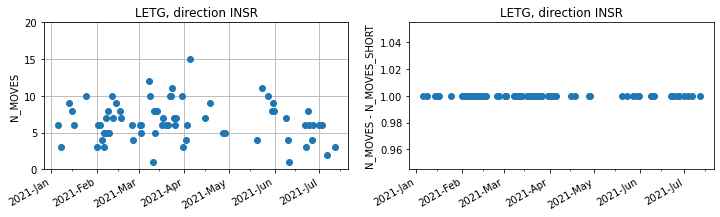

In [18]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plot_cxctime(out['times'], out['n_moves'], 'o')
plt.ylabel('N_MOVES')
plt.title('LETG, direction INSR')
plt.ylim(0, 20)
plt.grid()

plt.subplot(1, 2, 2)
plot_cxctime(out['times'], np.array(out['n_moves']) - np.array(out['n_moves_short']), 'o')
plt.ylabel('N_MOVES - N_MOVES_SHORT')
plt.title('LETG, direction INSR');

In [19]:
out = get_long_move_durations(otgm, grating='LETG', direction='INSR') 

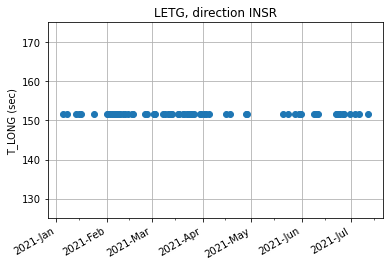

In [20]:
plot_cxctime(out['times'], out['long_durations'], 'o')
plt.grid()
plt.ylabel('T_LONG (sec)')
plt.title('LETG, direction INSR')
plt.ylim(125, 175);

In [21]:
np.mean(out['long_durations'])

151.7000093493663

In [22]:
np.std(out['long_durations'])

4.889333677480405e-08

In [23]:
out = get_short_move_durations(otgm, grating='LETG', direction='INSR') 

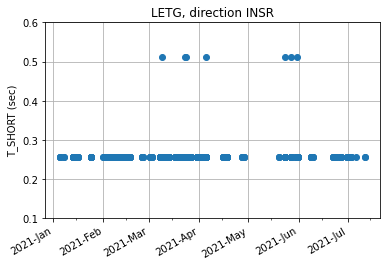

In [24]:
plot_cxctime(out['times'], out['short_durations'], 'o')
plt.grid()
plt.ylabel('T_SHORT (sec)')
plt.title('LETG, direction INSR')
plt.ylim(0.100, 0.600);

### LETG, direction RETR

In [25]:
out = get_n_moves(otgm, grating='LETG', direction='RETR') 

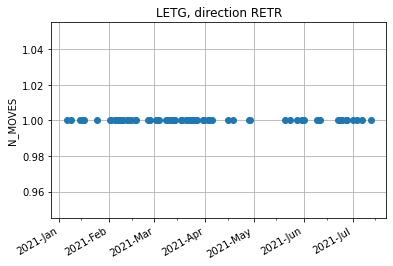

In [26]:
plot_cxctime(out['times'], out['n_moves'], 'o')
plt.grid()
plt.ylabel('N_MOVES')
plt.title('LETG, direction RETR');

In [27]:
out = get_long_move_durations(otgm, grating='LETG', direction='RETR') 

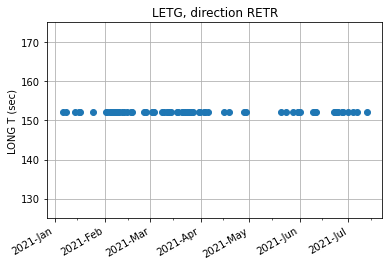

In [28]:
plot_cxctime(out['times'], out['long_durations'], 'o')
plt.grid()
plt.ylabel('LONG T (sec)')
plt.title('LETG, direction RETR')
plt.ylim(125, 175);

In [29]:
np.mean(out['long_durations'])

152.212509381939

In [30]:
np.std(out['long_durations'])

4.54262923471313e-08